In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [8]:
# Load data
data = pd.read_csv('finaldata2.csv', encoding='UTF-8')

scaler = MinMaxScaler()
scale_cols = ['new', 'temp', 'humi', 'naver', 'movement', 'vacc']

scaled = scaler.fit_transform(data[scale_cols])

df = pd.DataFrame(scaled, columns=scale_cols)

# Prepare dataset
y = df['new']
X = df[['temp', 'vacc', 'naver']]

# Train/test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=False)

C:\Users\cute2\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


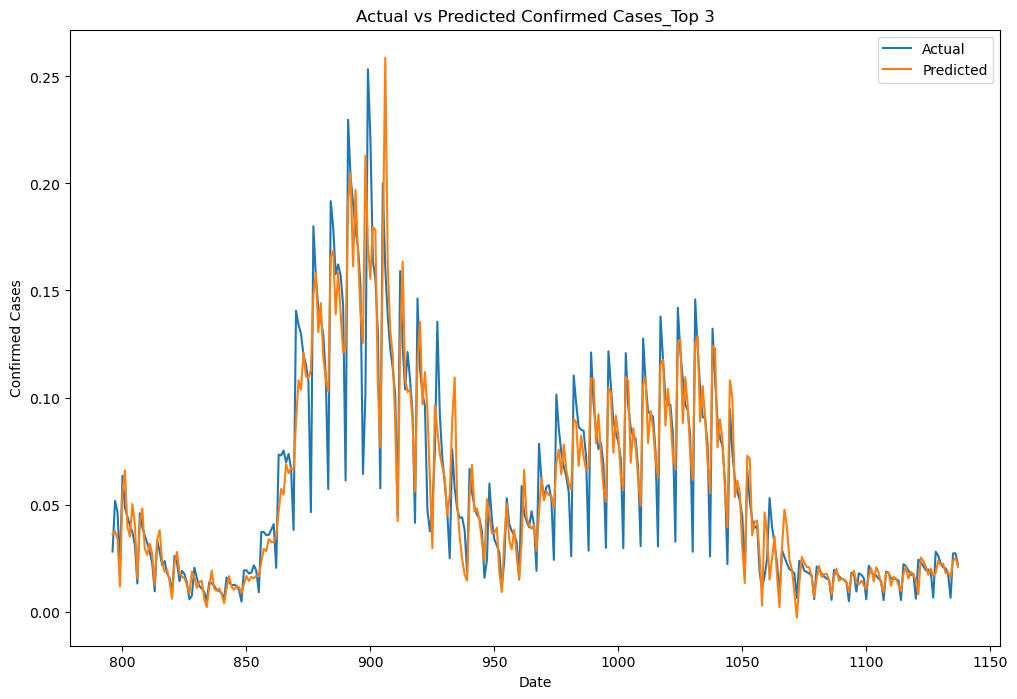

RMSE: 0.017980093377138434
MAE: 0.011020452578268797
R2: 0.8621531948248013


In [9]:
best_model = SARIMAX(endog=y, exog=X, order=(7, 1, 8), seasonal_order=(0, 0, 0, 0))
best_model_fit = best_model.fit()

# Make predictions
predictions = best_model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)

plt.figure(figsize=(12, 8))
plt.plot(test_y.index, np.asarray(test_y), label='Actual')
plt.plot(test_y.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases_Top 3')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")